# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [210]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [211]:
Lab3a_df = pd.read_csv('bc2.csv')

### Observe the no.of records in dataset and type of each feature 

In [212]:
Lab3a_df.shape

(699, 11)

In [213]:
Lab3a_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [214]:
Lab3a_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [215]:
Lab3a_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Check Missing Values

In [216]:
# checking Null values
Lab3a_df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [217]:
# checking NAN values
Lab3a_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [218]:
Lab3a_df.describe(include = 'all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [219]:
Lab3a_df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [220]:
# 16 occurences of '?' are identified in this column 'Bare Nuclei'

In [221]:
topvalue = Lab3a_df['Bare Nuclei'].describe(include = 'all').top

In [222]:
Lab3a_df['Bare Nuclei'] = Lab3a_df['Bare Nuclei'].replace('?', topvalue)

In [223]:
Lab3a_df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [224]:
Lab3a_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Print and plot the distribution of target variable (Class - using Histogram) 

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

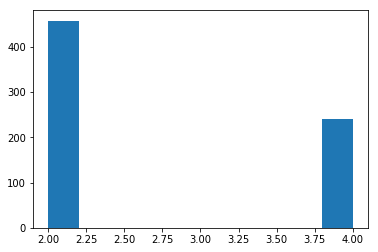

In [225]:
plt.hist(Lab3a_df['Class'])

In [226]:
print(Lab3a_df['Class'])

0      2
1      2
2      2
3      2
4      2
5      4
6      2
7      2
8      2
9      2
10     2
11     2
12     4
13     2
14     4
15     4
16     2
17     2
18     4
19     2
20     4
21     4
22     2
23     4
24     2
25     4
26     2
27     2
28     2
29     2
      ..
669    4
670    4
671    2
672    2
673    2
674    2
675    2
676    2
677    2
678    2
679    2
680    4
681    4
682    2
683    2
684    2
685    2
686    2
687    2
688    2
689    2
690    2
691    4
692    2
693    2
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64


### convert the datatype of Bare Nuclei to `int`

In [227]:
Lab3a_df['Bare Nuclei']=pd.to_numeric(Lab3a_df['Bare Nuclei'])
Lab3a_df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

### Standardization of Data (Use Standard Scaler)

In [228]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
scaled_df=scale.fit_transform(Lab3a_df)

In [229]:
scaled_df=pd.DataFrame(scaled_df,columns=Lab3a_df.columns)
scaled_df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,-0.725397
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,-0.725397
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


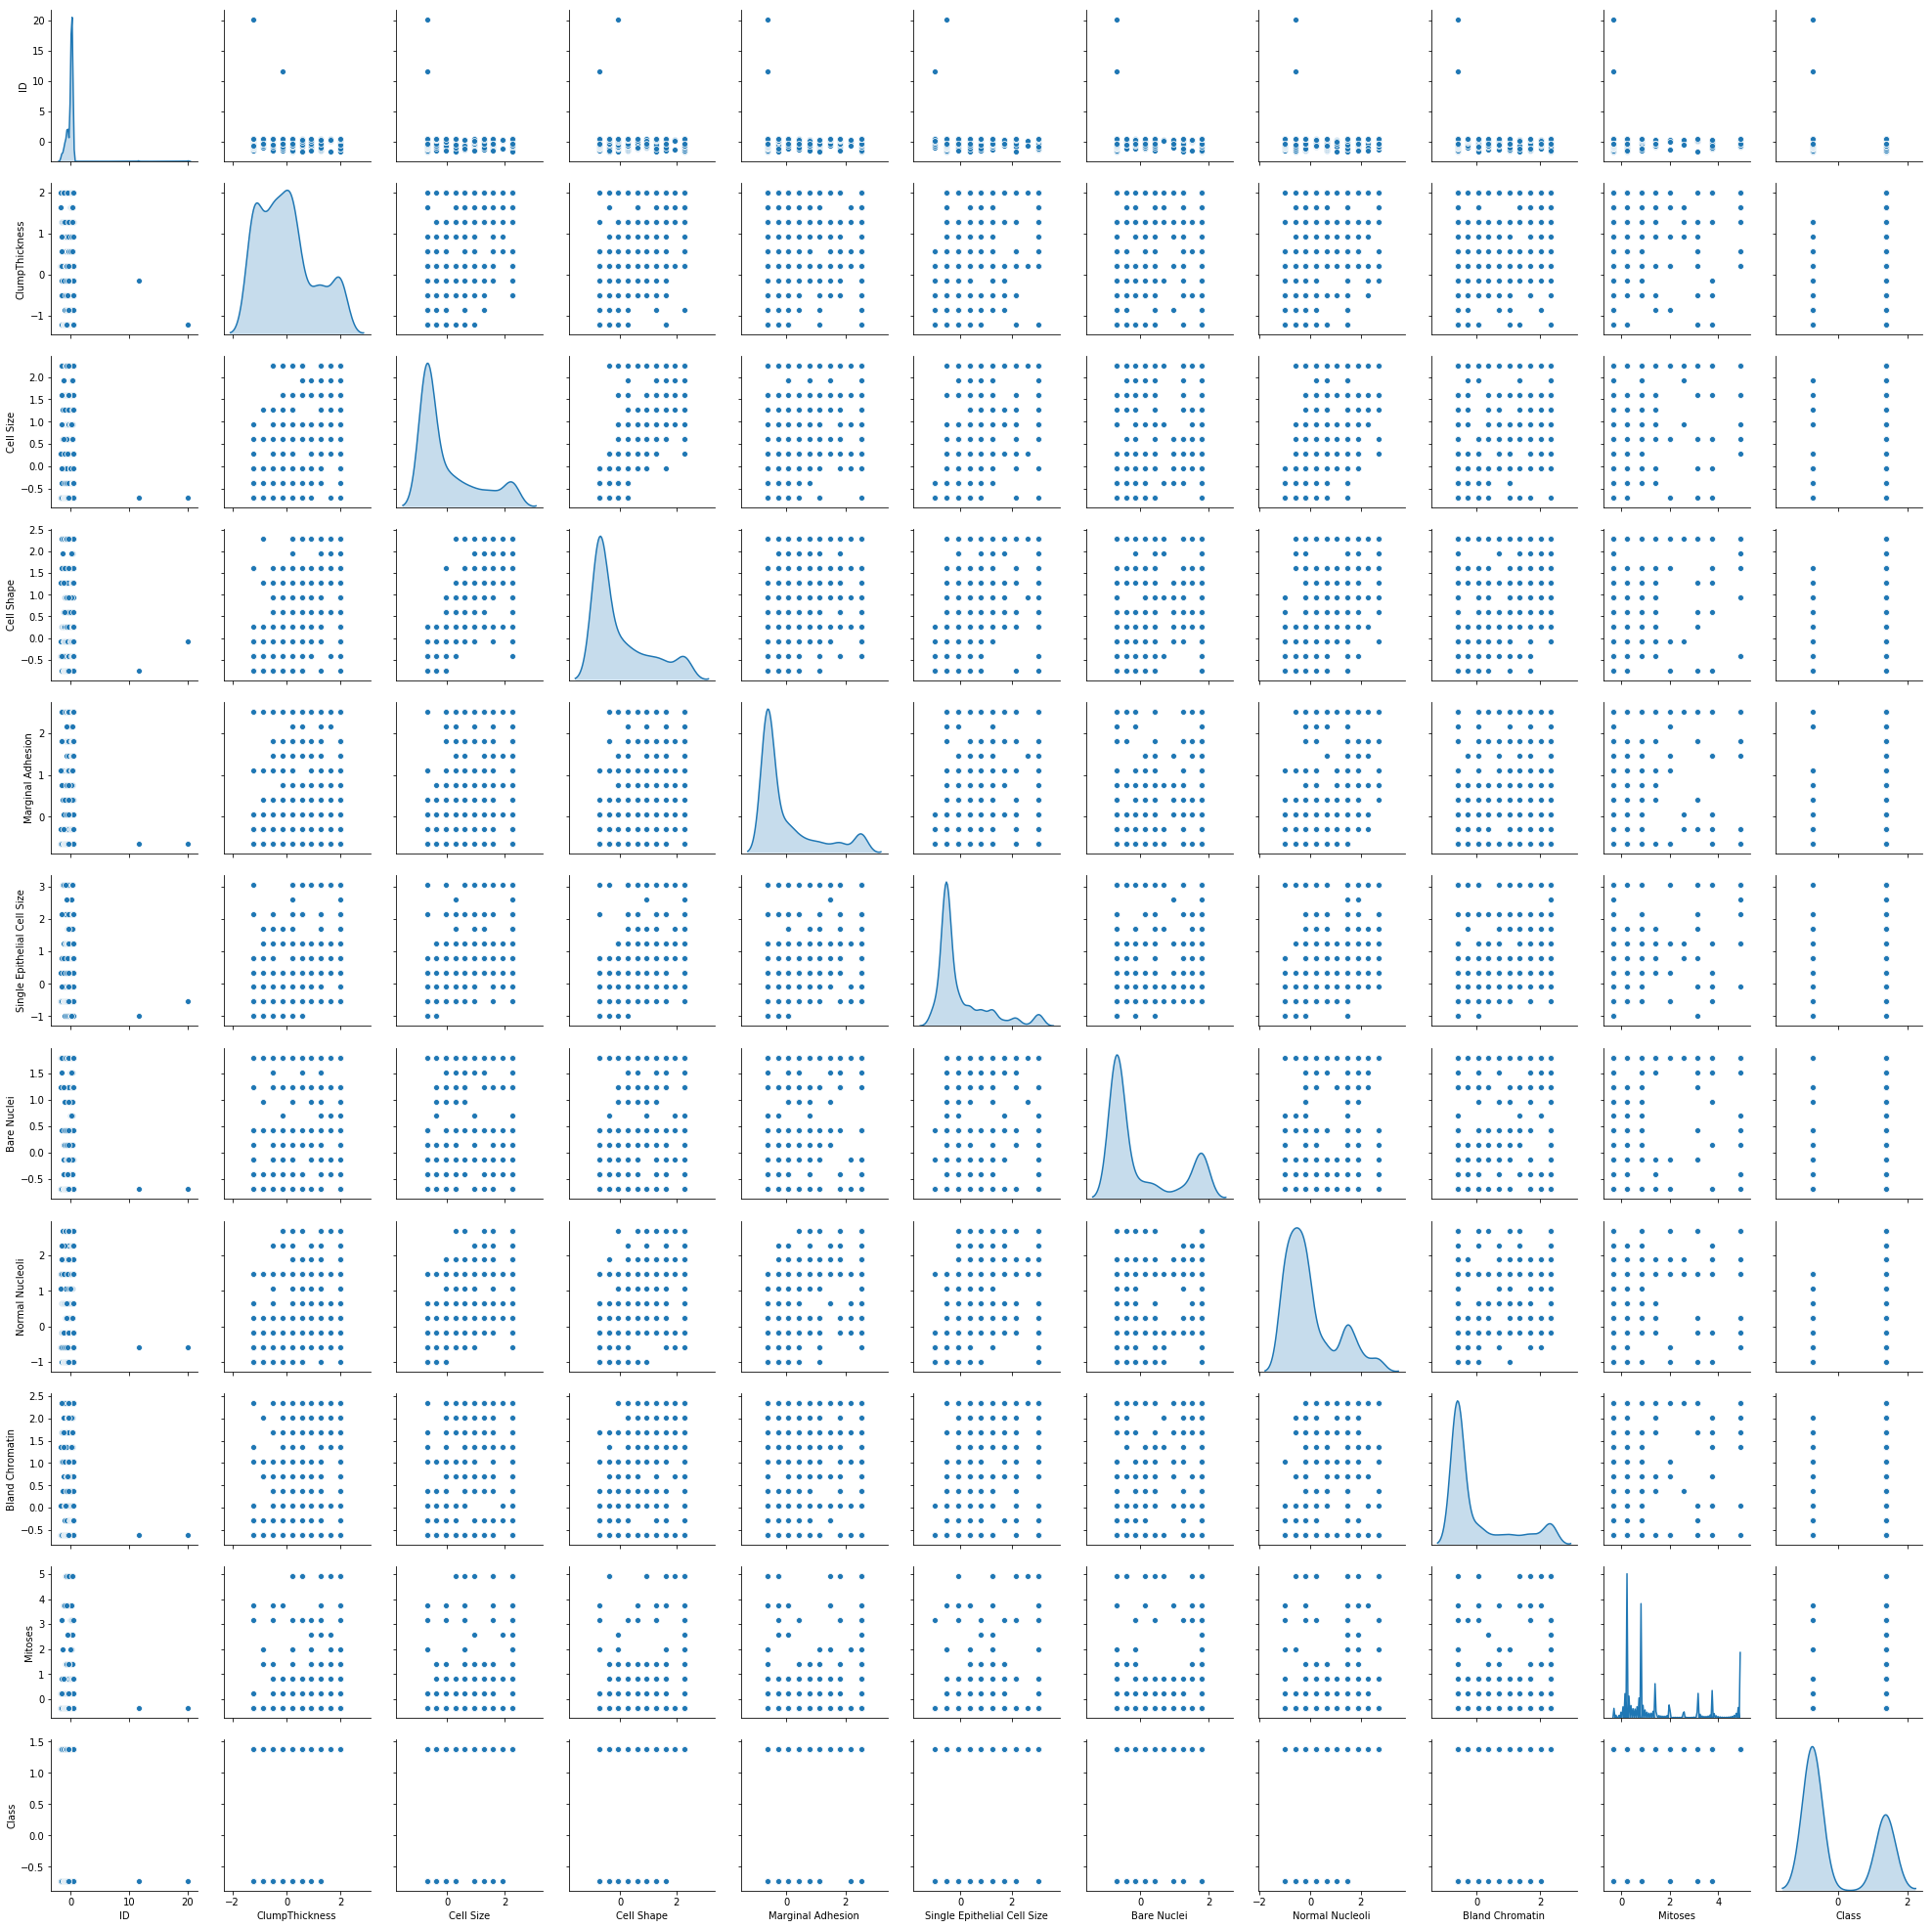

In [230]:
import seaborn as sns
sns.pairplot(scaled_df,diag_kind='kde')

In [231]:
scaled_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


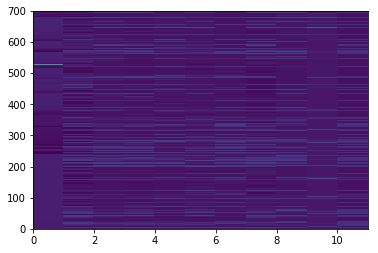

In [232]:
import matplotlib.pyplot as plt
plt.pcolor(scaled_df)
plt.show()

### Divide the dataset into feature set and target set

In [233]:
Train_set=scaled_df.drop(columns='Class')
Test_set=scaled_df.pop('Class')

In [234]:
LE=preprocessing.LabelEncoder()
LE.fit(Test_set)
Test_set=LE.transform(Test_set)

### Divide the Training and Test sets in 70:30 

In [246]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(Train_set, Test_set, test_size=0.30, random_state=2)

### Model 1 : Implement a default Decision Tree model with no attributes

In [247]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(criterion = 'entropy',random_state=1)


In [248]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [249]:
model1.feature_importances_

array([0.023829  , 0.05932082, 0.68228943, 0.02118179, 0.        ,
       0.04528298, 0.15002527, 0.00903535, 0.        , 0.00903535])

### Check the training & test accuracy of model 1 

In [250]:
from sklearn import metrics
ypred=model1.predict(X_test)

In [252]:
acc1=metrics.accuracy_score(y_test,ypred)
print(acc1)

0.919047619047619


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [262]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion = 'entropy',random_state=1,max_leaf_nodes=5,max_depth=10)
model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [264]:
from sklearn import metrics
ypred2=model2.predict(X_test)

### Check the training & test accuracy of model 2

In [265]:
acc2=metrics.accuracy_score(y_test,ypred2)
print(acc2)

0.9523809523809523


### Print the confusion matrix of model 1 and model 2

In [266]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[135,   7],
       [  3,  65]], dtype=int64)

In [267]:

confusion_matrix(y_test,ypred2)

array([[135,   7],
       [  3,  65]], dtype=int64)